<a href="https://colab.research.google.com/github/KishenPatel97/TextClustering/blob/main/Initial_EDA_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries and Dataset

In [ ]:
!pip install matplotlib==3.4.3

In [ ]:
!pip install datasets

In [95]:
from datasets import load_dataset
import spacy

from pathlib import Path
from os import listdir
from os.path import isfile, join
import os
import pandas as pd
import nltk
import spacy
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
# download stories from here
# https://cs.nyu.edu/~kcho/DMQA/

# 114 out of over 300,000 stories are missing text

# makes datafiles from this code
# https://github.com/becxer/cnn-dailymail/blob/master/make_datafiles.py

In [2]:
# """Load the dataset using huggingface data_loader"""
# type this command in the command line for the venv for this cell to work
# jupyter nbextension enable --py widgetsnbextension --sys-prefix 
dataset = load_dataset('cnn_dailymail', '3.0.0')

Reusing dataset cnn_dailymail (C:\Users\Cooper\.cache\huggingface\datasets\cnn_dailymail\3.0.0\3.0.0\3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [126]:
len(dataset["train"][0]["article"])

9396

In [131]:
print(dataset["train"][0]["article"])

It's official: U.S. President Barack Obama wants lawmakers to weigh in on whether to use military force in Syria. Obama sent a letter to the heads of the House and Senate on Saturday night, hours after announcing that he believes military action against Syrian targets is the right step to take over the alleged use of chemical weapons. The proposed legislation from Obama asks Congress to approve the use of military force "to deter, disrupt, prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction." It's a step that is set to turn an international crisis into a fierce domestic political battle. There are key questions looming over the debate: What did U.N. weapons inspectors find in Syria? What happens if Congress votes no? And how will the Syrian government react? In a televised address from the White House Rose Garden earlier Saturday, the president said he would take his case to Congress, not because he has to -- but because he wants t

In [130]:
print(dataset["train"][0]["highlights"])

Syrian official: Obama climbed to the top of the tree, "doesn't know how to get down"
Obama sends a letter to the heads of the House and Senate .
Obama to seek congressional approval on military action against Syria .
Aim is to determine whether CW were used, not by whom, says U.N. spokesman .


In [132]:
print(dataset["train"][0]["id"])

0001d1afc246a7964130f43ae940af6bc6c57f01


In [ ]:
# CNN_STORIES_PATH = Path("D:/__School/__Masters/____2021fALL/5290 nlp/stories/cnn/stories")
# DM_STORIES_PATH = Path("D:/__School/__Masters/____2021fALL/5290 nlp/stories/dailymail/stories")

In [ ]:
# def grab_files(directory):
#     for name in os.listdir(directory):
#        full_path = os.path.join(directory, name)
#        if os.path.isdir(full_path):
#            for entry in grab_files(full_path):
#                yield entry
#        elif os.path.isfile(full_path):
#            yield full_path
#        else:
#            print('Unidentified name %s. It could be a symbolic link' % full_path)

In [ ]:
#i = 0
#for file in grab_files(CNN_STORIES_PATH):
#    i+=1
#    print(file)
#    if i == 5:
#        break

In [ ]:
#f = open(CNN_STORIES_PATH.joinpath("0001d1afc246a7964130f43ae940af6bc6c57f01.story"), "r")
#print(f.read())

In [ ]:
#f = open(CNN_STORIES_PATH.joinpath("0002095e55fcbd3a2f366d9bf92a95433dc305ef.story"), "r")
#print(f.read())

# Data Analysis

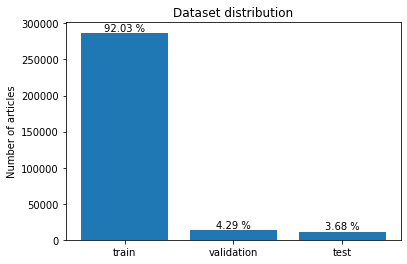

In [133]:
import matplotlib.pyplot as plt
import numpy as np

distrib = [dataset['train'].num_rows, dataset['validation'].num_rows, dataset['test'].num_rows]
sums = 0
for a in distrib:
    sums += a 

fig, ax = plt.subplots()
ind = np.arange(3)
p1 = ax.bar(ind, distrib)
ax.set_ylabel('Number of articles')
ax.set_title('Dataset distribution')
ax.set_xticks(ind)
ax.set_xticklabels(('train', 'validation', 'test'))
ax.bar_label(p1, labels=[str(round(a*100/sums,2))+' %' for a in distrib])
plt.show()

In [11]:
train_lens = []
validate_lens = []
test_lens = []

for doc in dataset['train']:
    train_lens.append(len(doc['article'].split()))

for doc in dataset['validation']:
    validate_lens.append(len(doc['article'].split()))

for doc in dataset['test']:
    test_lens.append(len(doc['article'].split()))


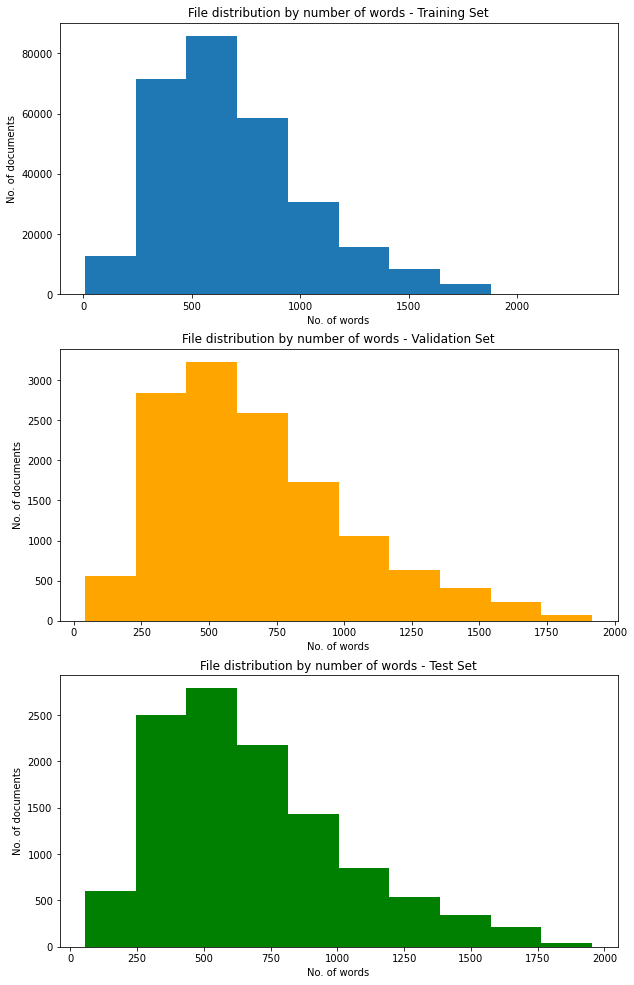

In [6]:
fig, ax2 = plt.subplots(3,1, figsize=(10,17))

ax2[0].hist(train_lens)
ax2[0].set_title('File distribution by number of words - Training Set')
ax2[0].set_xlabel('No. of words')
ax2[0].set_ylabel('No. of documents')
ax2[1].hist(validate_lens, color='orange')
ax2[1].set_title('File distribution by number of words - Validation Set')
ax2[1].set_xlabel('No. of words')
ax2[1].set_ylabel('No. of documents')
ax2[2].hist(test_lens, color='green')
ax2[2].set_title('File distribution by number of words - Test Set')
ax2[2].set_xlabel('No. of words')
ax2[2].set_ylabel('No. of documents')
plt.show()

The distribution plots above show that the dataset has maintained its distribution based on the number of words for the validation set and test set....[continue]

In [7]:
# words frequency calculation?

# Data preperation

In [17]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [59]:
processed_stopwords = []
for tok in stopwords:
    processed_stopwords.append(tok)
all_stops = processed_stopwords + stopwords

In [60]:
all_stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
from nltk.stem.snowball import SnowballStemmer, PorterStemmer
# stemmer = SnowballStemmer("english")
stemmer = PorterStemmer()

In [40]:
punctuation_signs = list("?:!.,;'")

# change to pandas df to run quicker
train_df = pd.DataFrame(dataset['train'])

# removing special characters
train_df['article'] = train_df['article'].str.replace("\r", " ")
train_df['article'] = train_df['article'].str.replace("\n", " ")
train_df['article'] = train_df['article'].str.replace("    ", " ")

# lowercasing text
train_df['article'] = train_df['article'].str.lower()

# removing punctuation
for punct_sign in punctuation_signs:
    train_df['article'] = train_df['article'].str.replace(punct_sign, '')

# remove possesive pronouns
train_df['article'] = train_df['article'].str.replace("'s", '')


C:\Users\Cooper\AppData\Local\Temp/ipykernel_4948/658068565.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_df['article'] = train_df['article'].str.replace(punct_sign, '')


In [43]:
# Original text
dataset['train'][0]['article'][:500]

'It\'s official: U.S. President Barack Obama wants lawmakers to weigh in on whether to use military force in Syria. Obama sent a letter to the heads of the House and Senate on Saturday night, hours after announcing that he believes military action against Syrian targets is the right step to take over the alleged use of chemical weapons. The proposed legislation from Obama asks Congress to approve the use of military force "to deter, disrupt, prevent and degrade the potential for future uses of che'

In [44]:
# Cleaned text
train_df['article'][0][:500]

'its official us president barack obama wants lawmakers to weigh in on whether to use military force in syria obama sent a letter to the heads of the house and senate on saturday night hours after announcing that he believes military action against syrian targets is the right step to take over the alleged use of chemical weapons the proposed legislation from obama asks congress to approve the use of military force "to deter disrupt prevent and degrade the potential for future uses of chemical wea'

In [137]:
# http://brandonrose.org/clustering
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [46]:
totalvocab_stemmed = []
totalvocab_tokenized = []

def per_row(row):
    allwords_stemmed = tokenize_and_stem(row.article) #for each article, tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) # extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(row.article)
    totalvocab_tokenized.extend(allwords_tokenized)
    
train_df[:10000].apply(per_row, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
9995    None
9996    None
9997    None
9998    None
9999    None
Length: 10000, dtype: object

In [47]:
totalvocab_tokenized

['its',
 'official',
 'us',
 'president',
 'barack',
 'obama',
 'wants',
 'lawmakers',
 'to',
 'weigh',
 'in',
 'on',
 'whether',
 'to',
 'use',
 'military',
 'force',
 'in',
 'syria',
 'obama',
 'sent',
 'a',
 'letter',
 'to',
 'the',
 'heads',
 'of',
 'the',
 'house',
 'and',
 'senate',
 'on',
 'saturday',
 'night',
 'hours',
 'after',
 'announcing',
 'that',
 'he',
 'believes',
 'military',
 'action',
 'against',
 'syrian',
 'targets',
 'is',
 'the',
 'right',
 'step',
 'to',
 'take',
 'over',
 'the',
 'alleged',
 'use',
 'of',
 'chemical',
 'weapons',
 'the',
 'proposed',
 'legislation',
 'from',
 'obama',
 'asks',
 'congress',
 'to',
 'approve',
 'the',
 'use',
 'of',
 'military',
 'force',
 'to',
 'deter',
 'disrupt',
 'prevent',
 'and',
 'degrade',
 'the',
 'potential',
 'for',
 'future',
 'uses',
 'of',
 'chemical',
 'weapons',
 'or',
 'other',
 'weapons',
 'of',
 'mass',
 'destruction',
 'its',
 'a',
 'step',
 'that',
 'is',
 'set',
 'to',
 'turn',
 'an',
 'international',
 'c

In [50]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 6419349 items in vocab_frame


In [ ]:
# continue for validation and test...

# Clustering

In [61]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                   min_df=0.2, stop_words=all_stops,
                                   use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(train_df[:10000].article) #fit the vectorizer to the articles

print(tfidf_matrix.shape)

(10000, 154)


In [62]:
terms = tfidf_vectorizer.get_feature_names_out()

In [67]:
dist = 1 - cosine_similarity(tfidf_matrix)

In [117]:
num_clusters = 30

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [121]:
articles = {"article": train_df[:10000].article,
            "highlights": train_df[:10000].highlights,
            "cluster": clusters,
            "id": train_df[:10000].id}

In [122]:
frame = pd.DataFrame(articles, index = [clusters], columns = ['article', 'highlights', 'cluster', 'id'])

In [123]:
frame['cluster'].value_counts()

15    680
1     639
13    584
21    549
25    527
17    518
4     436
8     391
16    383
14    382
5     376
19    370
18    351
29    331
2     287
11    285
7     254
10    251
27    242
22    238
6     231
24    228
20    225
23    223
3     204
28    184
26    175
0     173
12    170
9     113
Name: cluster, dtype: int64

In [81]:
# vocab_frame.loc[terms[ind]].values.tolist()[0][0]

In [86]:
"offici" in vocab_frame.index

True

In [124]:
print("Top terms per cluster:")
print()

order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print(f"Cluster {i} words:")
    
    for ind in order_centroids[i, :10]:
        if terms[ind] in vocab_frame.index:
            print(f"{vocab_frame.loc[terms[ind]].values.tolist()[0][0]}", end = '')
        else:
            print(f"KEYERROR: '{terms[ind]}' not in vocab index", end='')
        
        if ind != 10:
            print(", ", end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words:
showed, said, his, has, one, new, year, time, like, appeared, 

Cluster 1 words:
his, has, said, year, one, time, play, world, first, say, 

Cluster 2 words:
us, said, official, states, reporters, has, government, security, united, force, 

Cluster 3 words:
states, said, has, right, new, his, issues, would, national, year, 

Cluster 4 words:
said, authorityreporters, official, people, home, found, area, told, according, 

Cluster 5 words:
seconds, his, play, first, point, open, home, set, two, world, 

Cluster 6 words:
american, us, has, people, national, states, year, said, his, new, 

Cluster 7 words:
new, said, has, year, his, city, also, one, time, like, 

Cluster 8 words:
government, said, has, country, national, president, his, people, would, reporters, 

Cluster 9 words:
news, showed, use, us, think, may, states, reporters, said, time, 

Cluster 10 words:
security, said, force, government, reporters, has, killed, people, national, us, 

C

Fit 2 clusters
Fit 6 clusters
Fit 10 clusters
Fit 14 clusters
Fit 18 clusters
Fit 22 clusters
Fit 26 clusters
Fit 30 clusters
Fit 34 clusters
Fit 38 clusters
Fit 42 clusters
Fit 46 clusters
Fit 50 clusters
Fit 54 clusters
Fit 58 clusters
Fit 62 clusters
Fit 66 clusters
Fit 70 clusters
Fit 74 clusters
Fit 78 clusters
Fit 82 clusters
Fit 86 clusters
Fit 90 clusters
Fit 94 clusters
Fit 98 clusters
Fit 102 clusters
Fit 106 clusters
Fit 110 clusters
Fit 114 clusters
Fit 118 clusters
Fit 122 clusters
Fit 126 clusters
Fit 130 clusters
Fit 134 clusters
Fit 138 clusters
Fit 142 clusters
Fit 146 clusters
Fit 150 clusters
Fit 154 clusters
Fit 158 clusters
Fit 162 clusters
Fit 166 clusters
Fit 170 clusters
Fit 174 clusters
Fit 178 clusters
Fit 182 clusters
Fit 186 clusters
Fit 190 clusters
Fit 194 clusters
Fit 198 clusters
Fit 202 clusters
Fit 206 clusters
Fit 210 clusters
Fit 214 clusters
Fit 218 clusters
Fit 222 clusters
Fit 226 clusters
Fit 230 clusters
Fit 234 clusters
Fit 238 clusters
Fit 242

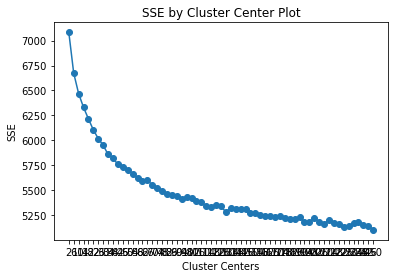

In [98]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 4)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(tfidf_matrix, 250)

In [104]:
clusters_5 = MiniBatchKMeans(n_clusters=5, init_size=1024, batch_size=2048, random_state=20).fit_predict(tfidf_matrix)
clusters_30 = MiniBatchKMeans(n_clusters=30, init_size=1024, batch_size=2048, random_state=20).fit_predict(tfidf_matrix)

In [115]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

C:\Users\Cooper\Documents\GitHub\TextClustering\env\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Cooper\Documents\GitHub\TextClustering\env\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Cooper\Documents\GitHub\TextClustering\env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Cooper\Documents\GitHub\TextClustering\env\lib\site-packages\sklearn\manifold\_t_

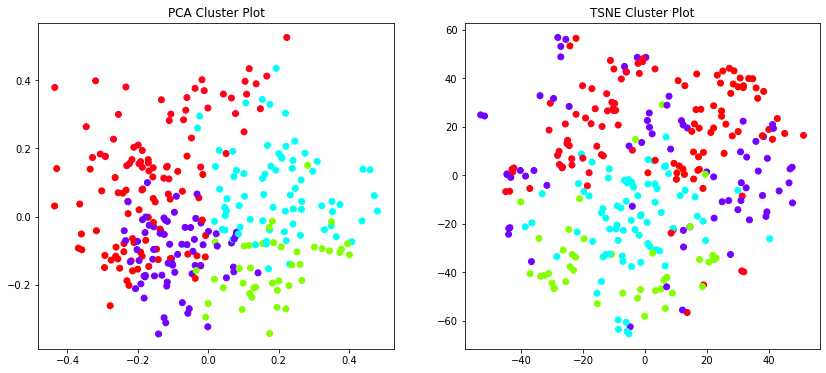

In [116]:
plot_tsne_pca(tfidf_matrix, clusters_5)

C:\Users\Cooper\Documents\GitHub\TextClustering\env\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Cooper\Documents\GitHub\TextClustering\env\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Cooper\Documents\GitHub\TextClustering\env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Cooper\Documents\GitHub\TextClustering\env\lib\site-packages\sklearn\manifold\_t_

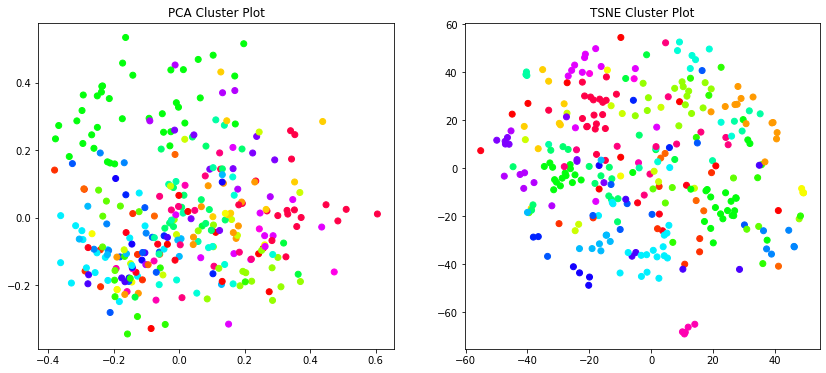

In [108]:
plot_tsne_pca(tfidf_matrix, clusters_30)

# Summarization

https://blog.paperspace.com/generating-text-summaries-gpt-2/

# Model Evaluations